### Environment setup

In [2]:
from pathlib import Path

import scanpy as sc
import scvelo as scv

### General settings

In [3]:
scv.settings.set_figure_params("scvelo")

### Data loading

In order to estimate RNA velocity with *scVelo*, unspliced and spliced counts need to be stored in AnnData's `layers` slot. We recommend passing whole counts, *i.e.*, unprocessed data, to the *scVelo* pipeline.

In [12]:
adata_anno = sc.read_h5ad("anndata_celltypist_anno.h5ad")


In [16]:
adata = adata_anno.raw.to_adata()
adata.obs = adata_anno.obs
adata.obs

,Barcode,batch,sample,group,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,...,_scvi_batch,_scvi_labels,leiden,leiden_0_25,leiden_0_5,leiden_2,celltypist_cell_label_coarse,celltypist_conf_score_coarse,celltypist_cell_label_fine,celltypist_conf_score_fine
AAACCTGGTGTTAAGA-1_GSM7008851_diab19.h5,AAACCTGGTGTTAAGA-1,GSM7008851,diab19,Non-diabetic,1896,7.548029,7644.0,8.941807,52.537938,61.250654,...,5,0,15,0,12,23,Epithelial cells,1.000000,Epithelial cells,1.0
AAACGGGAGACAGGCT-1_GSM7008851_diab19.h5,AAACGGGAGACAGGCT-1,GSM7008851,diab19,Non-diabetic,4132,8.326759,44074.0,10.693648,48.137224,63.822208,...,5,0,5,0,1,10,Epithelial cells,1.000000,Epithelial cells,1.0
AAACGGGAGACCACGA-1_GSM7008851_diab19.h5,AAACGGGAGACCACGA-1,GSM7008851,diab19,Non-diabetic,3230,8.080547,22885.0,10.038280,47.201224,62.866506,...,5,0,18,0,6,20,Epithelial cells,1.000000,Epithelial cells,1.0
AAACGGGAGTCCGTAT-1_GSM7008851_diab19.h5,AAACGGGAGTCCGTAT-1,GSM7008851,diab19,Non-diabetic,4063,8.309923,38684.0,10.563208,45.359839,62.077345,...,5,0,5,0,1,10,Epithelial cells,1.000000,Epithelial cells,1.0
AAACGGGCACACCGAC-1_GSM7008851_diab19.h5,AAACGGGCACACCGAC-1,GSM7008851,diab19,Non-diabetic,3652,8.203304,43625.0,10.683409,53.079656,68.291117,...,5,0,5,0,1,10,Epithelial cells,1.000000,Epithelial cells,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTGAGGTG-1_GSM7008846_diab7.h5,TTTGTCAGTTGAGGTG-1,GSM7008846,diab7,Diabetic,3701,8.216628,24013.0,10.086392,38.041894,53.371091,...,0,0,6,1,0,3,Epithelial cells,1.000000,Epithelial cells,1.0
TTTGTCATCAGTCCCT-1_GSM7008846_diab7.h5,TTTGTCATCAGTCCCT-1,GSM7008846,diab7,Diabetic,2528,7.835579,17522.0,9.771270,46.278964,64.444698,...,0,0,18,4,6,20,Epithelial cells,1.000000,Epithelial cells,1.0
TTTGTCATCCAAGTAC-1_GSM7008846_diab7.h5,TTTGTCATCCAAGTAC-1,GSM7008846,diab7,Diabetic,2496,7.822845,12960.0,9.469700,38.811728,56.172840,...,0,0,6,1,0,3,Epithelial cells,1.000000,Epithelial cells,1.0
TTTGTCATCCTTTCGG-1_GSM7008846_diab7.h5,TTTGTCATCCTTTCGG-1,GSM7008846,diab7,Diabetic,2044,7.623153,7727.0,8.952605,36.081273,52.620681,...,0,0,6,1,0,40,Epithelial cells,1.000000,Epithelial cells,1.0


## Data preprocessing

In [22]:
adata.layers["counts"]=adata.X
adata

AnnData object with n_obs × n_vars = 17563 × 17788
    obs: 'Barcode', 'batch', 'sample', 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'discard', 'n_genes', 'doublet_score', 'predicted_doublet', 'size_factors', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_0_25', 'leiden_0_5', 'leiden_2', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'initial_size'
    var: 'gene_ids', 'feature_types', 'genome', 'gene_names', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', '

需要剪切和未剪切的数据，没有就做不了，fastqhttps://combine-lab.github.io/alevin-tutorial/2020/alevin-velocity/

In [23]:
 scv.pp.filter_and_normalize(
     adata, 
     min_shared_counts=20,
     subset_highly_variable='seurat',
     n_top_genes=2000
     )

KeyError: 'spliced'

The data preprocessing so far similar to classical scRNA-seq workflows. In the case of RNA velocity, we additionally smooth observations by the mean expression in their neighborhood. This can be done using *scVelo*'s `moments` function.

In [6]:
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

In a typical workflow, we would cluster the data, infer cell types, and visualize the data in a two-dimensional embedding. Luckily, for the pancrease data, this information has already been calculated a priori and directly be used.

AttributeError: property 'categories' of 'Categorical' object has no setter

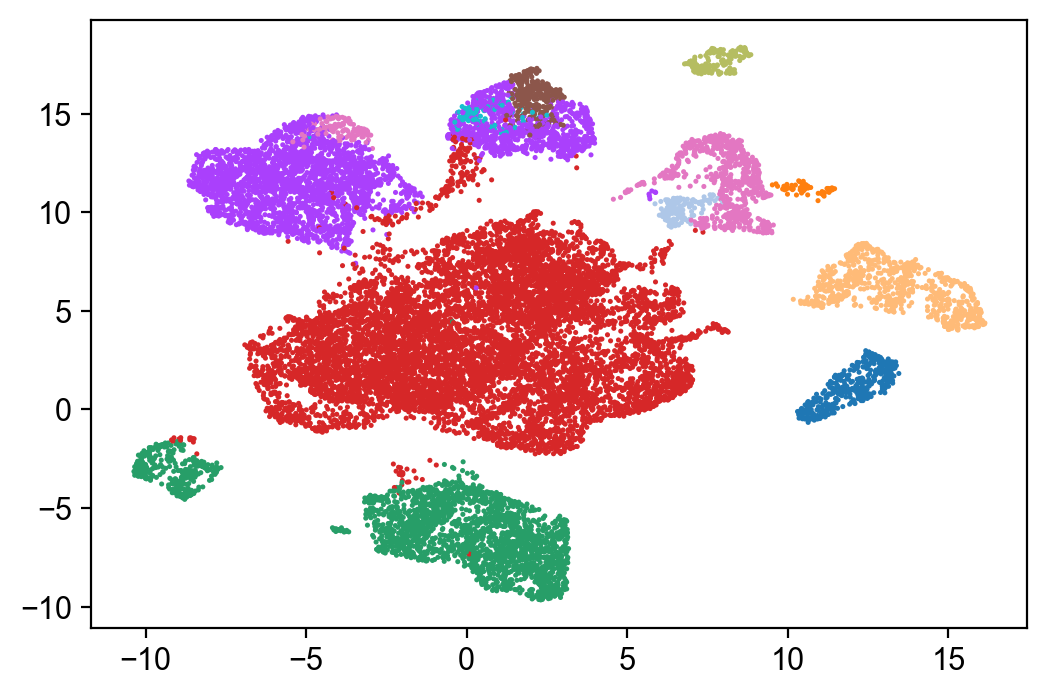

In [7]:
scv.pl.scatter(adata, basis="umap", color="celltypist_cell_label_coarse")  # 报错

### RNA velocity inference - *Steady-state model*

As a first step, we calculate RNA velocity under the steady state model. In this case, we call *scVelo*'s `velocity` function with `mode="deterministic"`.

In [ ]:
scv.tl.velocity(adata, mode="deterministic")

computing neighbors


2023-10-26 12:10:48.783803: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-26 12:10:48.785860: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-26 12:10:48.828854: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-26 12:10:49.540467: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


    finished (0:00:28) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocities


KeyError: 'Ms'

While we do not encourage over interpreting projections of high-dimensional velocity vectors onto a low dimensional representation of the data, *scVelo* offers a simple way of doing so.

In [ ]:
scv.tl.velocity_graph(adata, n_jobs=8)
scv.pl.velocity_embedding_stream(adata, basis="umap", color="leiden")

computing velocities


KeyError: 'Ms'

### RNA velocity inference - *EM model*

In order to calculate RNA velocity with the *EM model*, the parameters of splicing kinetics need to be infered first. The inference is taken care of by *scVelo*'s `recover_dynamics` function.

In [ ]:
scv.tl.recover_dynamics(adata, n_jobs=8)

recovering dynamics (using 8/96 cores)


  0%|          | 0/835 [00:00<?, ?gene/s]

    finished (0:01:00) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


The parameters of the splicing model are inferred by maximizing a given likelihood. To study which genes were fit most confidently by *scVelo*, we can study the corresponding phase portraits as well as the inferred trajectory (plotted in purple) and steady-state ratio (dashed purple line). Here, three out of the five shown genes (*Pcsk2*, *Top2a*, *Ppp1r1a*) exhibit phase portraits in a (partial) almond shape. We observe a clear transition either within a single cell type (*Top2a*, *Ppp1r1a*) or across several cell types (*Pcsk2*, from Pre-endocrine to Alpha and Beta). In the case of *Nfib*, we observe two cellular populations in steady state. This most likely an artifact of undersampling the phenotypic manifold around Ngn3 low/high EP cells. Similary, *Ghrl* is highly expressed in Epsilon cells although only a few due to the small cluster size. While current best practices are limited to analysing model fits and the confidence therein by hand, recently proposed methods can help automate the process (New directions). Here, *Nfib* abd *Ghrl* would be assigned with a lower confidence score.

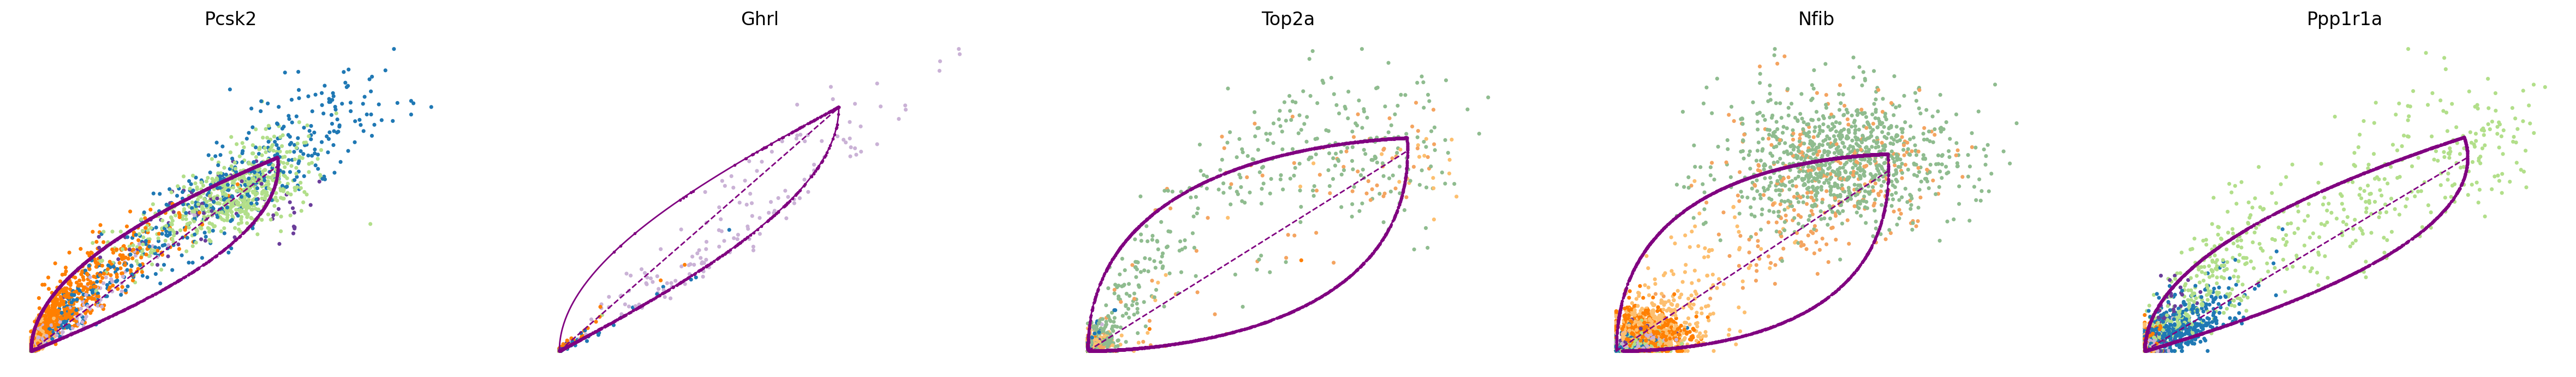

In [ ]:
top_genes = adata.var["fit_likelihood"].sort_values(ascending=False).index
scv.pl.scatter(adata, basis=top_genes[:5], color="clusters", frameon=False)

Having estimated the kinetics rates (stored as columns `fit_alpha`, `fit_beta`, `fit_gamma` of `adata.obs`), we can calculate both velocity and the projection onto our two-dimensional UMAP embedding.

In [ ]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata, n_jobs=8)
scv.pl.velocity_embedding_stream(adata, basis="umap")

NameError: name 'scv' is not defined

Based on the 2D projections, the *EM model* captures the cell cycle in the *Ductal* cells more faithfully. Additionally, the projection of the *steady-state model* exhibits a "backflow" from *Alpha*  to *Pre-endocrine* cells. However, for a rigorous and quantitative analysis, we recommend using downstream tools such as CellRank {cite}`velo:Lange2022` to assess model differences and draw conclusions.

## Key takeaways

To understand if RNA velocity analysis is applicable to a given dataset, we remark the following points:

1. To infer RNA velocity, the time scale of the developmental process under investigation must be comparable to the half-life of RNA molecules. This requirement is, for example, met in pancreatic endocrinogenesis {cite}`velo:BastidasPonce2019` but not in long term diseases such as Alzheimer's or Parkinson's disease. Similarly, RNA velocity analysis is not applicable to steady-state systems such as peripheral blood mononuclear cells lacking any transitions between (mature) cell types.
2. RNA velocity can only be inferred robustly and reliantly if the underlying model assumptions (approximately) hold true. To check the assumptions, the phase portraits can be studied to verify that they exhibit the expected almond shape. If a gene includes multiple, pronounced kinetcs, RNA velocity analysis should be applied with caution and the data possibly subsetted to individual lineages.
3. Classically, the high-dimensional RNA velocity vectors have been visualized by projecting them onto a low-dimensional representation of the data. This approach for verifying hypotheses can be erronous and misleading as the projecteceted velocity stream is highly dependend on (1) the number of included genes and (2) chosen plotting parameters. Additionally, the projection quality decreases at the boundary of the low dimensional embedding {cite}`velo:LaManno2018`.

## New directions

Although RNA velocity has been applied successfully to many systems, some model limitations persist. Violated model assumptions may cause erronous result {cite}`velo:Bergen2021, velo:Barile2021`, and projecting the high dimensional velocity vectors onto a low dimensional representation of the data misleading. To overcome these pitfalls several tools have been developed. CellRank {cite}`velo:Lange2022`, for example, uses the inferred velocity field to infer likely future states of a cell. As the algorithm operates on the higher dimensional representation of the data, misleading velocity streams on embeddings are circumvented. Contrastingly, a recent publication tries to improve the quality of the lower dimensional embedding {cite}`velo:MarotLassauzaie2022`.

To soften current assumptions of RNA velocity inference, several new approaches have been suggested {cite}`velo:Qiao2021, velo:MarotLassauzaie2022, velo:Chen2022, velo:Riba2022, velo:Gu2022, velo:Gu2022-PLMR`, {cite}`velo:Gayoso2022`. For example, these methods try to no longer assume constant rates {cite}`velo:Chen2022, velo:Gu2022-PLMR`, work with raw counts {cite}`velo:Gu2022-PLMR`, or reformulate the inference methods in a variational inference framework to associate uncertainty with estimates {cite}`velo:Gayoso2022`. Additionally, to aid in understanding if RNA velocity analysis can be inferred for individual genes or entire datasets, different procedures have been proposed {cite}`velo:Zheng2022, velo:Gayoso2022`.

## References

```{bibliography}
:filter: docname in docnames
:labelprefix: velo
```